In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import binom as b

#To wrap title in graph
from textwrap import wrap

# Importing Dataset

In [2]:
df = pd.read_csv('aerofit_treadmill.txt')
df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120


# Problem Statement & Anaysis 

>**Problem Statements**
>> We have to check how gender,income education is affecting the choice of customer to purchase a particular Treadmills. We have to find the relationship between them. 

>> We want to recommend the Treadmills to the new customer according to the ustomer characteristics.

>> By calculating the above relationship we want to increase our Sales for Treadmills

## 2.Analysis of DataSets

#### 1.Checking for shape

In [3]:
df.shape

(180, 9)

#### 2.Checing information & datatype for data set

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [5]:
#Checking of data types of columns
df.dtypes

Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object

#### 3.Conversion of DataTypes to Category

In [6]:
#Converting Product from object to Category
df['Product'] = df['Product'].astype('category')

#Converting Gender from object to Category
df['Gender'] = df['Gender'].astype('category')

#Converting MaritalStatus from object to Category
df['MaritalStatus'] = df['MaritalStatus'].astype('category')

#Converting Fitness from int to Categorical value
df['Fitness'] =  df['Fitness'].astype('category')

In [7]:
df.dtypes

Product          category
Age                 int64
Gender           category
Education           int64
MaritalStatus    category
Usage               int64
Fitness          category
Income              int64
Miles               int64
dtype: object

#### 4.Checking for Null Values

In [8]:
df.isna().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

#### 5. Statistical summary

In [9]:
df.describe(include = 'all')

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,180,180.000000,180,180.000000,180,180.000000,180.0,180.000000,180.000000
unique,3,NaN,2,NaN,2,NaN,5.0,NaN,NaN
top,KP281,NaN,Male,NaN,Partnered,NaN,3.0,NaN,NaN
freq,80,NaN,104,NaN,107,NaN,97.0,NaN,NaN
mean,NaN,28.788889,NaN,15.572222,NaN,3.455556,NaN,53719.577778,103.194444
std,NaN,6.943498,NaN,1.617055,NaN,1.084797,NaN,16506.684226,51.863605
min,NaN,18.000000,NaN,12.000000,NaN,2.000000,NaN,29562.000000,21.000000
25%,NaN,24.000000,NaN,14.000000,NaN,3.000000,NaN,44058.750000,66.000000
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,NaN,50596.500000,94.000000
75%,NaN,33.000000,NaN,16.000000,NaN,4.000000,NaN,58668.000000,114.750000


# Non-Graphical Analysis

>### 1.Value Counts

**1 . Value counts for different Products**

In [10]:
df['Product'].value_counts()

KP281    80
KP481    60
KP781    40
Name: Product, dtype: int64

**2 . Value counts for different Gender**

In [11]:
df['Gender'].value_counts()

Male      104
Female     76
Name: Gender, dtype: int64

**3 . Value counts for MaritalStatus**

In [12]:
df['MaritalStatus'].value_counts()

Partnered    107
Single        73
Name: MaritalStatus, dtype: int64

**4 . Value counts for MaritalStatus**

In [13]:
df['Fitness'].value_counts()

3    97
5    31
2    26
4    24
1     2
Name: Fitness, dtype: int64

>### 2.Unique Values

**1. Unique Values for Ages**

In [14]:
df['Age'].unique()

array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 43, 44, 46, 47, 50, 45, 48, 42],
      dtype=int64)

**2. Unique values for Education**

In [15]:
df['Education'].unique()

array([14, 15, 12, 13, 16, 18, 20, 21], dtype=int64)

**3. Unique Values for Usage**

In [16]:
df['Usage'].unique()

array([3, 2, 4, 5, 6, 7], dtype=int64)

**4. Unique Values for Miles**

In [17]:
df['Miles'].unique()

array([112,  75,  66,  85,  47, 141, 103,  94, 113,  38, 188,  56, 132,
       169,  64,  53, 106,  95, 212,  42, 127,  74, 170,  21, 120, 200,
       140, 100,  80, 160, 180, 240, 150, 300, 280, 260, 360], dtype=int64)

**5. Unique Values of Income**

In [18]:
df['Income'].unique()

array([ 29562,  31836,  30699,  32973,  35247,  37521,  36384,  38658,
        40932,  34110,  39795,  42069,  44343,  45480,  46617,  48891,
        53439,  43206,  52302,  51165,  50028,  54576,  68220,  55713,
        60261,  67083,  56850,  59124,  61398,  57987,  64809,  47754,
        65220,  62535,  48658,  54781,  48556,  58516,  53536,  61006,
        57271,  52291,  49801,  62251,  64741,  70966,  75946,  74701,
        69721,  83416,  88396,  90886,  92131,  77191,  52290,  85906,
       103336,  99601,  89641,  95866, 104581,  95508], dtype=int64)

# Visual Analysis

>## 1.Univariate Analysis

**Count plot**

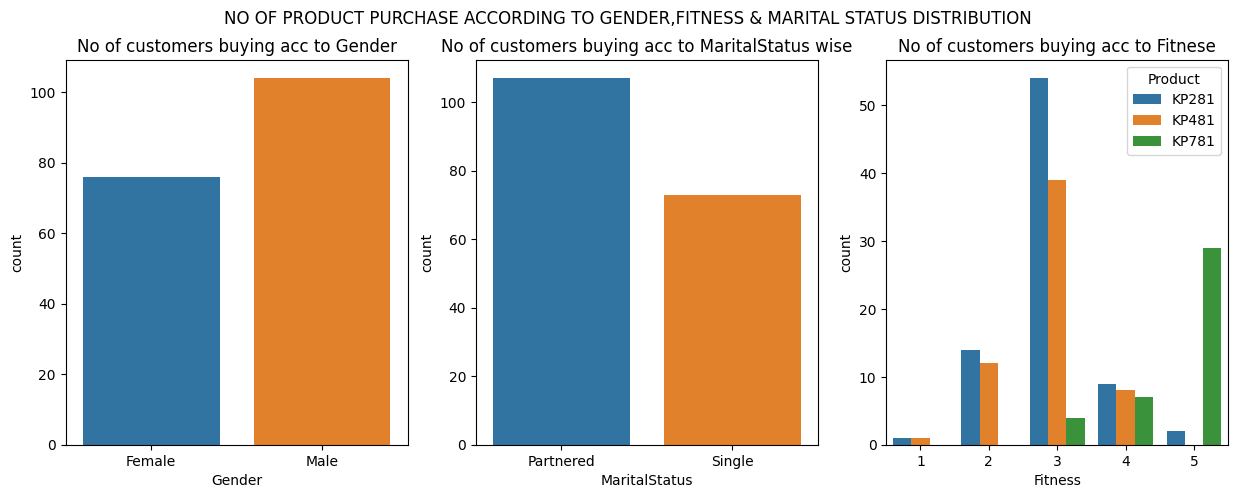

In [19]:
figure, axes = plt.subplots(1, 3,
                            figsize=(15, 5))
figure.suptitle('NO OF PRODUCT PURCHASE ACCORDING TO GENDER,FITNESS & MARITAL STATUS DISTRIBUTION')
axes[0].set_title("No of customers buying acc to Gender")
axes[1].set_title("No of customers buying acc to MaritalStatus wise")
axes[2].set_title("No of customers buying acc to Fitnese")

plt.subplot(1,3,1)
sns.countplot(data=df,x='Gender')

plt.subplot(1,3,2)
sns.countplot(data=df,x='MaritalStatus')

plt.subplot(1,3,3)
sns.countplot(data=df,x='Fitness',hue='Product')

plt.show()


>## 2.Bivariate Analysis

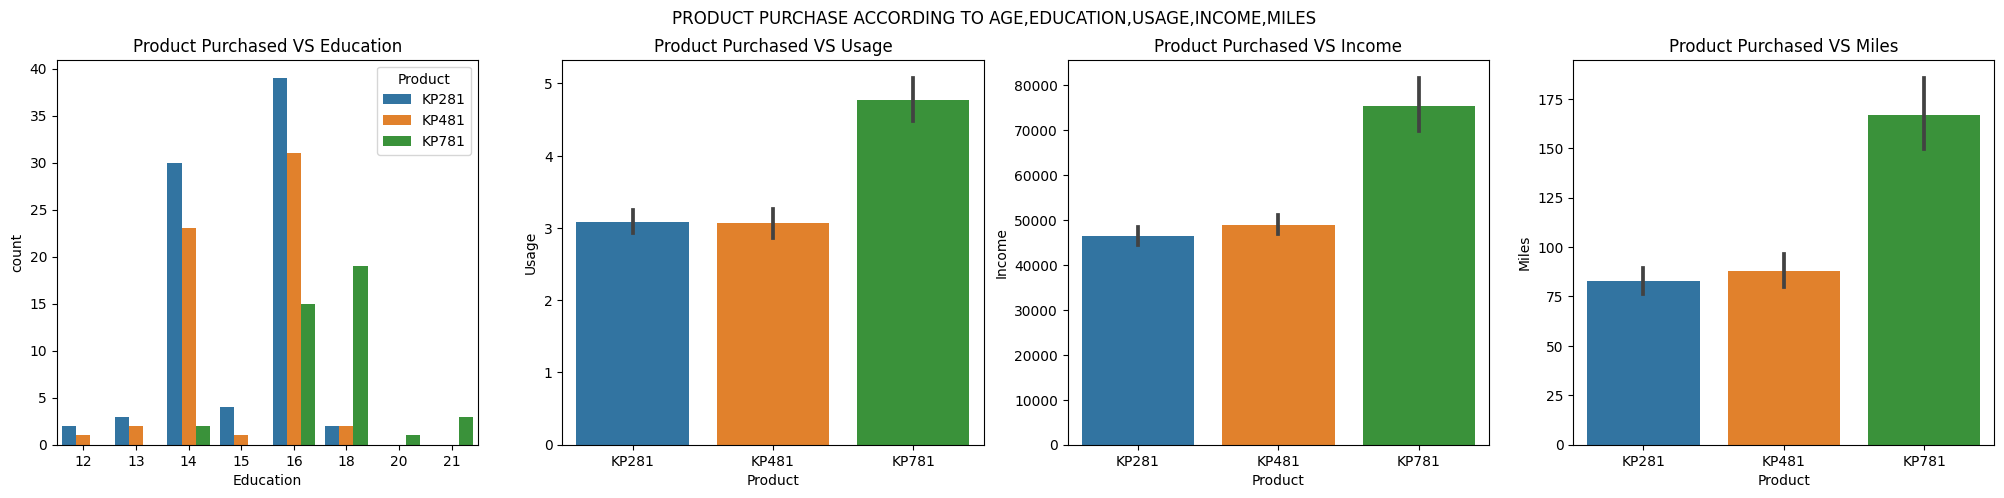

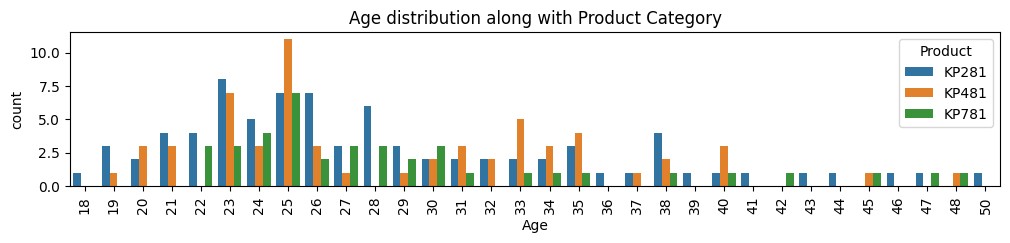

In [20]:


figure, axes = plt.subplots(1, 4,
                            figsize=(25, 5))
figure.suptitle('PRODUCT PURCHASE ACCORDING TO AGE,EDUCATION,USAGE,INCOME,MILES')
axes[0].set_title("Product Purchased VS Education")
axes[1].set_title("Product Purchased VS Usage")
axes[2].set_title("Product Purchased VS Income")
axes[3].set_title("Product Purchased VS Miles")


plt.subplot(1,4,1)
sns.countplot(data=df,hue='Product',x = 'Education')

plt.subplot(1,4,2)
sns.barplot(data=df,x='Product',y = 'Usage')

plt.subplot(1,4,3)
sns.barplot(data=df,x='Product',y = 'Income')

plt.subplot(1,4,4)
sns.barplot(data=df,x='Product',y = 'Miles')

plt.show()

plt.figure(figsize=(12,2))
sns.countplot(data=df,hue='Product',x='Age')
plt.xticks(rotation=90)
plt.title('Age distribution along with Product Category')
plt.show()

**Histogram**

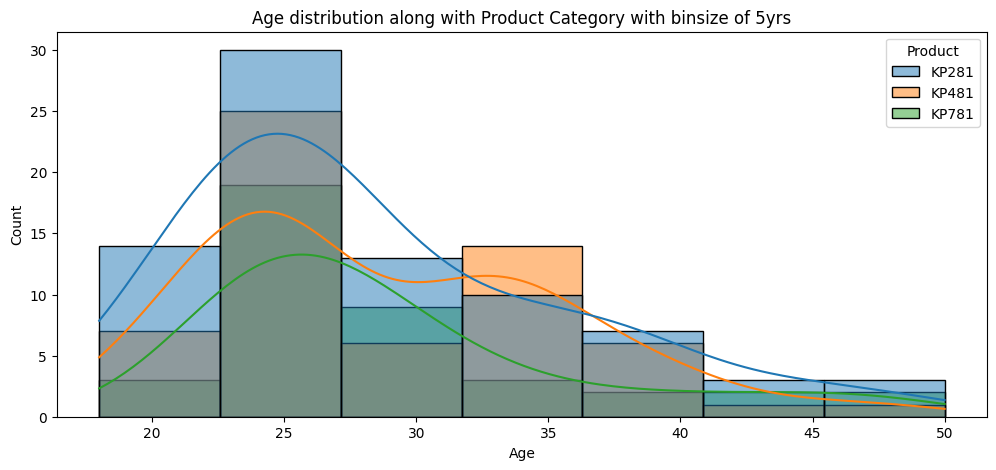

In [21]:
plt.figure(figsize=(12,5))
sns.histplot(data=df,x='Age',bins=7,kde=True,hue='Product')
plt.title('Age distribution along with Product Category with binsize of 5yrs')
plt.show()

**Box PLots**

Text(0.5, 1.0, 'Box plot for Miles')

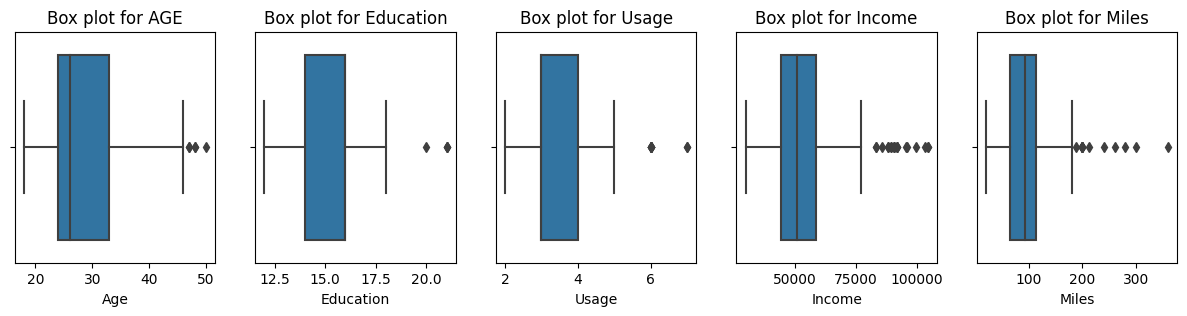

In [22]:
plt.figure(figsize=(15,3))
plt.subplot(1,5,1)
sns.boxplot(data=df,x='Age')
plt.title('Box plot for AGE')

plt.subplot(1,5,2)
sns.boxplot(data=df,x='Education')
plt.title('Box plot for Education')

plt.subplot(1,5,3)
sns.boxplot(data=df,x='Usage')
plt.title('Box plot for Usage')

plt.subplot(1,5,4)
sns.boxplot(data=df,x='Income')
plt.title('Box plot for Income')

plt.subplot(1,5,5)
sns.boxplot(data=df,x='Miles')
plt.title('Box plot for Miles')


**Correlation Detection**

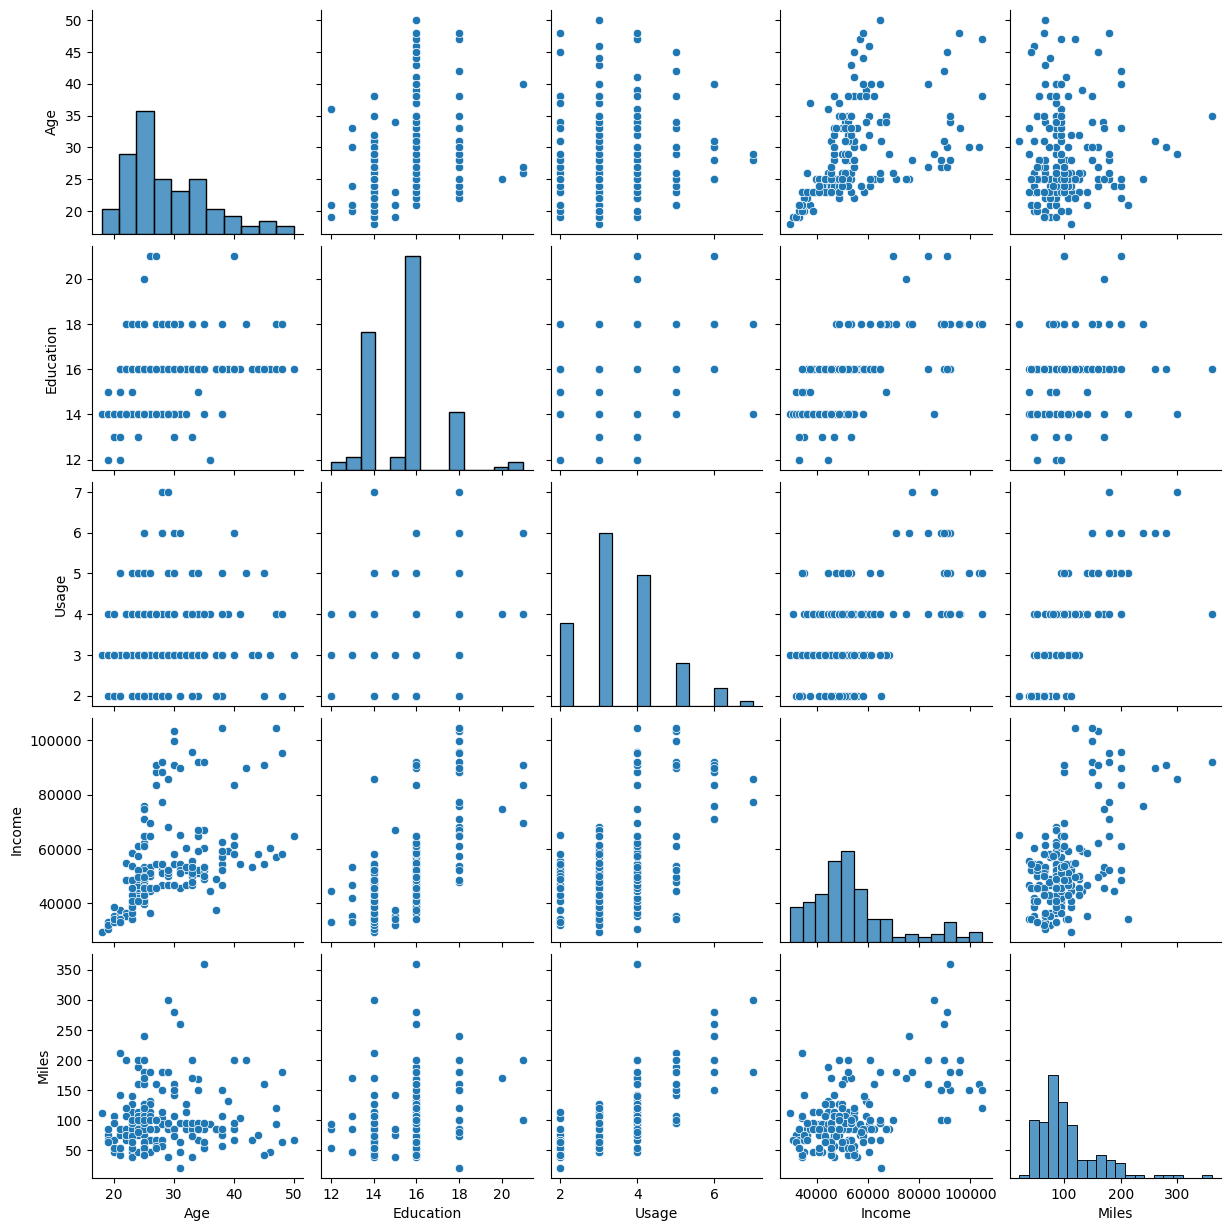

In [23]:
sns.pairplot(data=df)
plt.show()

**Heat Map**

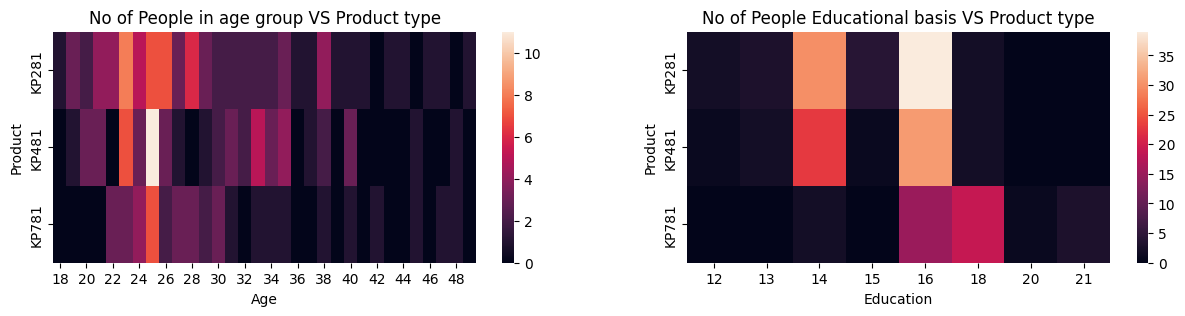

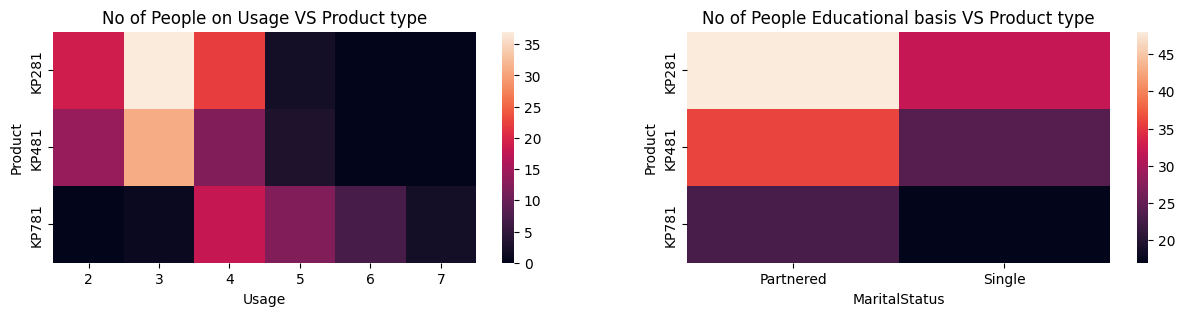

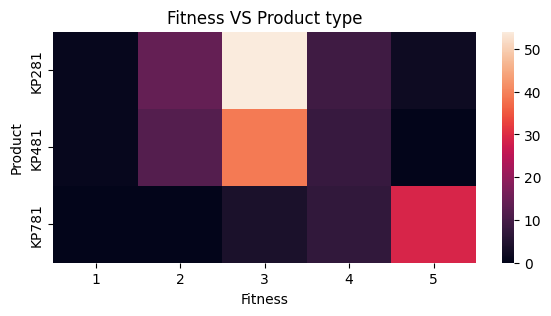

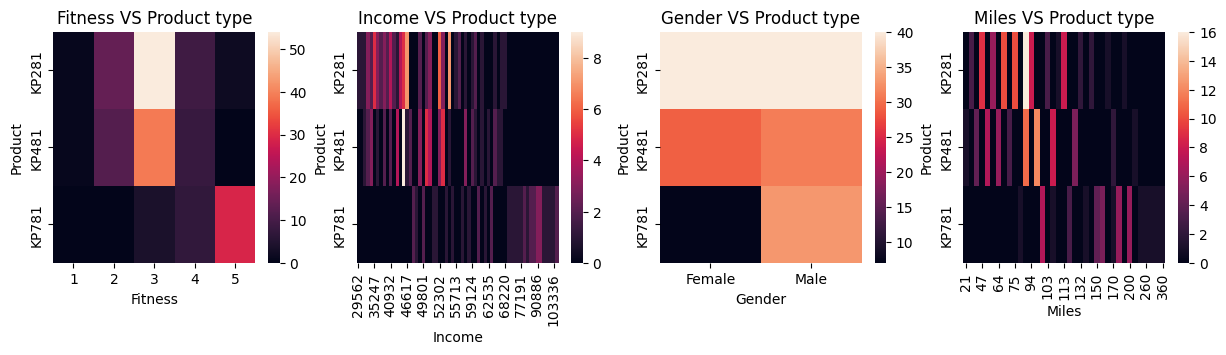

In [24]:
plt.figure(figsize=(15,3))
plt.subplot(1,2,1)
a = df.groupby('Product').Age.value_counts().unstack().fillna(0)
sns.heatmap(a)
plt.title('No of People in age group VS Product type')

plt.subplot(1,2,2)
b = df.groupby('Product')[['Education']].value_counts().unstack().fillna(0)
sns.heatmap(b)
plt.title('No of People Educational basis VS Product type')
plt.show()

plt.figure(figsize=(15,3))
plt.subplot(1,2,1)
a = df.groupby('Product').Usage.value_counts().unstack().fillna(0)
sns.heatmap(a)
plt.title('No of People on Usage VS Product type')

plt.subplot(1,2,2)
b = df.groupby('Product')[['MaritalStatus']].value_counts().unstack().fillna(0)
sns.heatmap(b)
plt.title('No of People Educational basis VS Product type')
plt.show()

plt.figure(figsize=(15,3))
plt.subplot(1,2,1)
a1 = pd.crosstab(df.Product,columns=[df.Fitness])
sns.heatmap(a1)
plt.title('Fitness VS Product type')

plt.figure(figsize=(15,3))
plt.subplot(1,4,1)
a1 = pd.crosstab(df.Product,columns=[df.Fitness])
sns.heatmap(a1)
plt.title('Fitness VS Product type')

plt.subplot(1,4,2)
a1 = pd.crosstab(df.Product,columns=[df.Income])
sns.heatmap(a1)
plt.title('Income VS Product type')

plt.subplot(1,4,3)
a1 = pd.crosstab(df.Product,columns=[df.Gender])
sns.heatmap(a1)
plt.title('Gender VS Product type')

plt.subplot(1,4,4)
a1 = pd.crosstab(df.Product,columns=[df.Miles])
sns.heatmap(a1)
plt.title('Miles VS Product type')
plt.show()

> **Outliers Detections**: The values with black dot in box plots are the outliers . We have to remove this outliers

# Missing Values & Outliers Detection

**Outliers Detection**

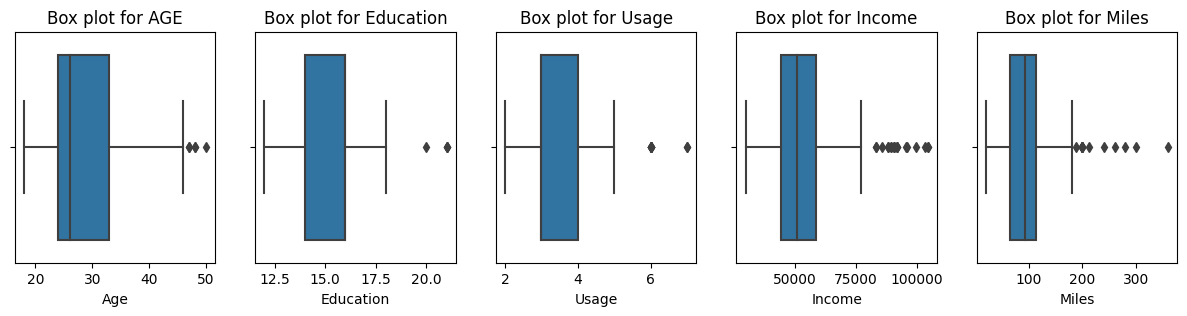

>**Outliers** : This are the Black dots in BOX plot shown above

In [25]:
#Use 25% & 75% to calculate IQR= 75% - 25%
# outliers > 75% + 1.5 * IQR 
df.describe()

,Age,Education,Usage,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,53719.577778,103.194444
std,6.943498,1.617055,1.084797,16506.684226,51.863605
min,18.000000,12.000000,2.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,104581.000000,360.000000


In [26]:
# Outliers for Age
df.loc[df['Age']>47,'Age']

79     50
139    48
179    48
Name: Age, dtype: int64

In [27]:
# Outliers for Education
df.loc[df['Education']>19,'Education']

156    20
157    21
161    21
175    21
Name: Education, dtype: int64

In [28]:
# Outliers for Usage
df.loc[df['Usage']>5.5,'Usage']

154    6
155    6
162    6
163    7
164    6
166    7
167    6
170    6
175    6
Name: Usage, dtype: int64

In [29]:
# Outliers for Miles
df.loc[df['Miles']>187.875,'Miles']

23     188
84     212
142    200
148    200
152    200
155    240
166    300
167    280
170    260
171    200
173    360
175    200
176    200
Name: Miles, dtype: int64

**Missing Values Detection**

In [30]:
df.isna().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

# Probability Calculations

**Category wise Product Probability**

In [31]:
S = df.shape[0]
a1 = df.loc[df['Product']=='KP281','Product'].shape[0]
print('Probability of TreadMill to be KP281 is {}'.format(round(a1/S,4)))

a2 = df.loc[df['Product']=='KP481','Product'].shape[0]
print('Probability of TreadMill to be KP481 is {}'.format(round(a2/S,4)))

a3 = df.loc[df['Product']=='KP781','Product'].shape[0]
print('Probability of TreadMill to be KP781 is {}'.format(round(a3/S,4)))

Probability of TreadMill to be KP281 is 0.4444
Probability of TreadMill to be KP481 is 0.3333
Probability of TreadMill to be KP781 is 0.2222


**1.Gender Vs Product**

In [32]:
pd.crosstab(df.Product,df.Gender,margins=True)

Gender,Female,Male,All
Product,,,
KP281,40,40,80
KP481,29,31,60
KP781,7,33,40
All,76,104,180


In [33]:
print()
print('__'*40)
###################   Buying of **KP281** on Basis of Gender Calculation ################
print("Buying of **KP281** on Basis of Gender Calculation")

#Probability that a person buy KP281 irrespective of gender
print('Probability that a person buy KP281 irrespective of gender is {}'.format(round(80/180,2)))

#Probability that a person buy KP281 given Male
print('Probability that a person buy KP281 given Male is {}'.format(round(40/80,2)))

#Probability that a person buy KP281 given Female
print('Probability that a person buy KP281 given Female is {}'.format(round(40/80,2)))
print()
print('__'*40)



############################# Buying of **KP481** on Basis of Gender Calculation ##########################################
print("Buying of **KP481** on Basis of Gender Calculation")

#Probability that a person buy KP481 irrespective of gender
print('Probability that a person buy KP481 irrespective of gender is {}'.format(round(60/180,2)))

#Probability that a person buy KP481 given Male
print('Probability that a person buy KP481 given Male is {}'.format(round(31/60,2)))

#Probability that a person buy KP481 given Female
print('Probability that a person buy KP481 given Female is {}'.format(round(29/60,2)))
print()
print('__'*40)



##############################  Buying of **KP781** on Basis of Gender Calculation ###################
print("Buying of **KP781** on Basis of Gender Calculation")

#Probability that a person buy KP781 irrespective of gender
print('Probability that a person buy KP781 irrespective of gender is {}'.format(round(40/180,2)))

#Probability that a person buy KP781 given Male
print('Probability that a person buy KP781 given Male is {}'.format(round(33/40,2)))

#Probability that a person buy KP781 given Female
print('Probability that a person buy KP781 given Female is {}'.format(round(7/40,2)))
print()
print('__'*40)


________________________________________________________________________________
Buying of **KP281** on Basis of Gender Calculation
Probability that a person buy KP281 irrespective of gender is 0.44
Probability that a person buy KP281 given Male is 0.5
Probability that a person buy KP281 given Female is 0.5

________________________________________________________________________________
Buying of **KP481** on Basis of Gender Calculation
Probability that a person buy KP481 irrespective of gender is 0.33
Probability that a person buy KP481 given Male is 0.52
Probability that a person buy KP481 given Female is 0.48

________________________________________________________________________________
Buying of **KP781** on Basis of Gender Calculation
Probability that a person buy KP781 irrespective of gender is 0.22
Probability that a person buy KP781 given Male is 0.82
Probability that a person buy KP781 given Female is 0.17

_________________________________________________________________

**2.MaritalStatus Vs Product**

In [34]:
pd.crosstab(df.Product,df.MaritalStatus,margins=True)

MaritalStatus,Partnered,Single,All
Product,,,
KP281,48,32,80
KP481,36,24,60
KP781,23,17,40
All,107,73,180


In [35]:
print()
print('__'*40)
###################   Buying of **KP281** on Basis of MaritalStatus ################
print("Buying of **KP281** on Basis of MaritalStatus")

#Probability that a person buy KP281 irrespective of MaritalStatus
print('Probability that a person buy KP281 irrespective of MaritalStatus is {}'.format(round(80/180,2)))

#Probability that a person buy KP281 given Married/Parterned
print('Probability that a person buy KP281 given Married/Parterned is {}'.format(round(48/80,2)))

#Probability that a person buy KP281 given Unmarried/Single
print('Probability that a person buy KP281 given Unmarried/Single is {}'.format(round(32/80,2)))
print()
print('__'*40)



############################# Buying of **KP481** on Basis of MaritalStatus ##########################################
print("Buying of **KP481** on Basis of MaritalStatus")

#Probability that a person buy KP481 irrespective of MaritalStatus
print('Probability that a person buy KP481 irrespective of MaritalStatus is {}'.format(round(60/180,2)))

#Probability that a person buy KP481 given Married/parterned
print('Probability that a person buy KP481 given Married/parterned is {}'.format(round(36/60,2)))

#Probability that a person buy KP481 given Unmarried/Single
print('Probability that a person buy KP481 given Unmarried/Single is {}'.format(round(24/60,2)))
print()
print('__'*40)



##############################  Buying of **KP781** on Basis of MaritalStatus ###################
print("Buying of **KP781** on Basis of MaritalStatus")

#Probability that a person buy KP781 irrespective of MaritalStatus
print('Probability that a person buy KP781 irrespective of MaritalStatus is {}'.format(round(40/180,2)))

#Probability that a person buy KP781 given Married/parterned
print('Probability that a person buy KP781 given Married/parterned is {}'.format(round(23/40,2)))

#Probability that a person buy KP781 given Unmarried/Single
print('Probability that a person buy KP781 given Unmarried/Single is {}'.format(round(17/40,2)))
print()
print('__'*40)


________________________________________________________________________________
Buying of **KP281** on Basis of MaritalStatus
Probability that a person buy KP281 irrespective of MaritalStatus is 0.44
Probability that a person buy KP281 given Married/Parterned is 0.6
Probability that a person buy KP281 given Unmarried/Single is 0.4

________________________________________________________________________________
Buying of **KP481** on Basis of MaritalStatus
Probability that a person buy KP481 irrespective of MaritalStatus is 0.33
Probability that a person buy KP481 given Married/parterned is 0.6
Probability that a person buy KP481 given Unmarried/Single is 0.4

________________________________________________________________________________
Buying of **KP781** on Basis of MaritalStatus
Probability that a person buy KP781 irrespective of MaritalStatus is 0.22
Probability that a person buy KP781 given Married/parterned is 0.57
Probability that a person buy KP781 given Unmarried/Single i

# Business Insights based on Non-Graphical and Visual Analysis

**Insight baased on Visual Analysis**

> **1 :** It can be seen from Graph that higly Educated people(>= 18yrs) tend to buy **KP781** more frequently compared to people with less year of Education buys **KP281** and also some people buy **KP481**

> **2 :** People with Higher Average Usage no of Hours(i.e. Hours >= 3) a week uses **KP781** and remaining people choses **KP281** or **KP481** as per their requirements

> **3 :** People with Highest Income prefer(income >= 48000) **KP781** as they can afford the price

> **4 :** People with the higher average number of miles choses **KP781** followed by **KP481** and then least by **KP281**  

>**5 :**  from Heatmap we can say that People using **KP781** are lying in Age group of **22 to 30** , People using **KP481** are lying in Age group of **20 to 42** ,People using **KP281** are lying in Age group of **19 to 38**
>>**5.1 :** People in the age range of **22-28** Uses Treadmill more compared to people of other Ages

>**6 :**  From Count plot. The no of people having a Fitness score of **5(i.e. best shape)** prefer **KP781** more.
People with fitness Score lying between **2.5-4** prefer **KP481** & people with **score < 2.5** were using **KP281**
>>**6.1 :** **KP781** having an additional impact on the Fitness Score 

>**7 :** **Observation from Scatterplots & Pair plots :**
>>**7.1 :** People with **age > 25**, People with **Education in Years >= 18** were having **Income higher** as compared to other people
>>**7.2 :** People with **age < 35** , People  with **Education < 18**,People with **Income <60000** were walking **More miles**

**Insight based on Non Graphical Analysis**

> **8 :** No of People buyings **KP281**(i.e. 44.4 %) is more followed by **KP481**(i.e. 33.33 %) & Then **KP781**(i.e. 22.22 %). The above figure in bracket indicate Probability of People buying Treadmill w/o any criteria

> **9 :** for **KP281 & KP481** Gender effect is not much effect but for **KP781** Male Prefer more compared to Female as shown below
>> **9.1 :** Probability that a person buy **KP281 given Male is 0.5** & &  person buy  **KP281 given Female is 0.5**. No effect of Gender
>> **9.2 :** Probability that a person buy **KP481 given Male is 0.52** & &  person buy  **KP481 given Female is 0.48** No effect of Gender
>> **9.3 :** Probability that a person buy **KP781 given Male is 0.82** & &  person buy **KP781 given Female is 0.17**.There is an effect of Gender

> **10 :** Probability of Married/Partnered buying Treadmill is more compared to Unmarried/Single
>> **10.1 :** Probability that a person buy **KP281** given Married/Parterned is 0.6 &  person buy **KP281** given Unmarried/Single is 0.4
>> **10.2 :** Probability that a person buy **KP481** given Married/Parterned is 0.6 &  person buy **KP481** given Unmarried/Single is 0.4
>> **10.3 :** Probability that a person buy **KP781** given Married/Parterned is 0.57 &  person buy **KP781** given Unmarried/Single is 0.42

# Recommendations

>**1 :** People with Higher Education will have higer Salary/Income and they often buy **KP781** more compared to other. So its better to reccomend them this product

> **2 :** People having a **Fitness Score of 5** .Mostly Prefer **KP781** so we can say for a Person who is willing to having a good fitness we should recommend **KP781**.

>**3 :** People who are Married/Partnered buy Treadmill more so its better to give discount on price to increase Sales

>**4 :** People at Younger **Age < 20** buys **KP281** more frequently. So its better to recomend this kind of Treadmill to younger People

> **5 :** **Male** having a higer chance of buying **KP781** Compared to Female. So its better to recommend this Treadmills to **Males**.If we want to increase Sales then we can provide Discount on Price